# Homework 6
## Jacob Traunero

### Problem 1



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sympy as sp
import sys
from tabulate import tabulate

In [0]:
def hwFunction(x):
  return x - 4*np.sin(2*x) + 3.245892718783470

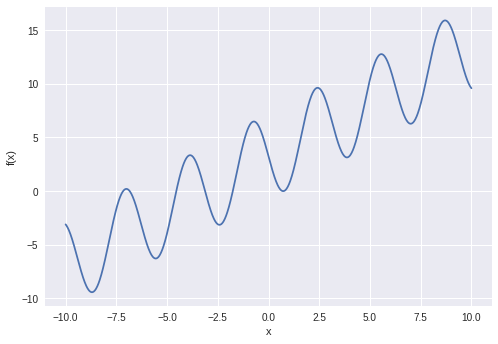

In [0]:
x = np.linspace(-10, 10, 1000)
fig = plt.figure()
plt.plot(x, hwFunction(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

There are 5 zero crossings in this graph.


### Problem 2
##### a)


In [0]:
def bisectionMethod(func, a, b, TOL, trackIterations=False):
  k=0
  result = []
  while(True):
    middle = a + (b-a)/2
    result.append((middle, k, (b-a)/2))
    if (abs(b-a) <= TOL or abs(func(middle)) <= np.finfo(float).eps):
      if trackIterations:
        return result
      else:
        return (middle,k)
    
    if ((func(a) < 0 and func(middle) < 0) or (func(a)>0 and func(middle)>0)):
      a = middle
    else:
      b = middle
    k+=1


#### b)


In [0]:
def derivativeHwFunc(x):
  return(1-8*np.cos(2*x))

In [0]:
def newtonsMethod(func, guess, TOL, trackIterations = False):
  x0 = guess
  k = 0
  result = []
  while(k<100):
    if (trackIterations):
      result.append((x0, k))
    x = x0- func(x0)/derivativeHwFunc(x0)
    if (abs(x-x0)<=TOL or abs(func(x0)) <= np.finfo(float).eps):
      if trackIterations:
        return result
      else:
        return (x,k)
    x0 = x
    k+=1
  return None

#### c)


In [0]:
def secantMethod(func,x0,x1,TOL,trackIterations=False):
  k=0
  result = []
  while(True):
    result.append((x1,k));
    x2 = x1-func(x1)*((x1-x0)/(func(x1)-func(x0)))
    if (abs(x2-x1)<=TOL or abs(func(x2)) <= np.finfo(float).eps):
      if trackIterations:
        return result
      else:
        return (x2,k)
    x0 = x1
    x1 = x2
    k+=1

### Problem 3



In [0]:
bisectionResult = bisectionMethod(hwFunction,-4.8,-4.2, 10**(-10))
newtonResult = newtonsMethod(hwFunction,-4.2, 10**(-10))
secantResult = secantMethod(hwFunction,-4.8,-4.2, 10**(-10))
print(tabulate([["Bisection", bisectionResult[1], bisectionResult[0]], ["Newton's", newtonResult[1], newtonResult[0]], ["Secant", secantResult[1], secantResult[0]]], headers=["Method","Iterations", "Root"]))

Method       Iterations      Root
---------  ------------  --------
Bisection            33  -4.54677
Newton's              4  -4.54677
Secant                5  -4.54677


The root computed by each method was -4.54677. Refer to the table above for the number of iterations for each method.

### Problem 4

In [68]:
trueRoot = opt.fsolve(hwFunction, -4.2)[0]
bisectionResult = bisectionMethod(hwFunction,-4.8,-4.2, 10**(-10), True)
newtonResult = newtonsMethod(hwFunction,-4.2, 10**(-10), True)
secantResult = secantMethod(hwFunction,-4.8,-4.2, 10**(-10), True)

def newtSecError(actual,result):
  return abs(actual-result[0])

def bisectionError(actual,result):
  return result[2]

def formatResultWithConvergence(resultSet, r, errorFunc, trueRoot):
  formattedResult = []
  for result in resultSet:
    formattedResult.append([result[1], errorFunc(trueRoot,result)])
  for i, result in enumerate(formattedResult, 0):
    if i+1 < len(formattedResult): 
      result.append(formattedResult[i+1][1]/(result[1]**r))
      result.append(formattedResult[i+1][1]/(result[1]))
    else:
      result.append("N/A")
  return formattedResult
    
bisectionTableData = map(lambda x: x[:3],formatResultWithConvergence(bisectionResult, 1, bisectionError, trueRoot))
newtonTableData = map(lambda x: x[:3], formatResultWithConvergence(newtonResult, 2, newtSecError, trueRoot))
secantTableData = map(lambda x: x[:3], formatResultWithConvergence(secantResult,1.62, newtSecError,trueRoot))

bisectionTable = tabulate(bisectionTableData, headers=["Iterations", "E_k", "E_k+1/E_k^r"])
newtonTable = tabulate(newtonTableData, headers=["Iterations", "E_k", "E_k+1/E_k^r"])
secantTable = tabulate(secantTableData, headers=["Iterations", "E_k", "E_k+1/E_k^r"])

print("Bisection Method\n",bisectionTable, "\n\nNewton Method\n",newtonTable, "\n\nSecant Method\n", secantTable)


Bisection Method
   Iterations          E_k  E_k+1/E_k^r
------------  -----------  -------------------
           0  0.3          0.5
           1  0.15         0.5000000000000014
           2  0.075        0.5
           3  0.0375       0.5000000000000059
           4  0.01875      0.5000000000000119
           5  0.009375     0.5
           6  0.0046875    0.5
           7  0.00234375   0.49999999999990524
           8  0.00117187   0.5
           9  0.000585937  0.5000000000003789
          10  0.000292969  0.5
          11  0.000146484  0.49999999999848416
          12  7.32422e-05  0.5
          13  3.66211e-05  0.4999999999939367
          14  1.83105e-05  0.4999999999878734
          15  9.15527e-06  0.5
          16  4.57764e-06  0.5
          17  2.28882e-06  0.4999999999029872
          18  1.14441e-06  0.4999999998059745
          19  5.72205e-07  0.5
          20  2.86102e-07  0.5
          21  1.43051e-07  0.5000000015522043
          22  7.15256e-08  0.5
          23  3.

###Problem 5


In [76]:
newtonResult = newtonsMethod(hwFunction,1, 10**(-10), True)
trueRoot = opt.fsolve(hwFunction, .72)[0]
newtonTableData = formatResultWithConvergence(newtonResult, 2, newtSecError,trueRoot)
newtonTable = tabulate(newtonTableData, headers=["Iterations", "E_k", "E_k+1/E_k^r", "E_k+1/E_k"])

print(newtonTable)

  Iterations          E_k  E_k+1/E_k^r           E_k+1/E_k
------------  -----------  ------------------  -----------
           0  0.277266     1.7776726339079432     0.492888
           1  0.136661     3.6567999550621804     0.499742
           2  0.0682951    7.330685715976641      0.50065
           3  0.034192     14.638553917201401     0.500521
           4  0.0171138    29.2343155247444       0.50031
           5  0.0085622    58.41577640276161      0.500168
           6  0.00428254   116.7736393842019      0.500087
           7  0.00214164   233.48682791969276     0.500046
           8  0.00107092   466.91193411618315     0.500025
           9  0.000535486  933.7615104683405      0.500016
          10  0.000267752  1867.4603447276222     0.500016
          11  0.00013388   3734.8578553816583     0.500024
          12  6.69433e-05  7469.652739274591      0.500043
          13  3.34746e-05  14939.241861112536     0.500085
          14  1.67401e-05  29878.4253043938       0.500168

The convergence rate is 1, but it was 2 in problem 4. At this root, the derivitive of f is 0 so it only converges linearly instead of quadratically.

